# Testing the adjacency_tensor function

In [1]:
import numpy as np
import xgi
import networkx as nx
import copy
from collections import OrderedDict, Counter
import matplotlib.pyplot as plt
from itertools import permutations

from hyperfunctions import *

The hypergraph has [0, 1, 2, 4, 5, 3] nodes and ['a', 'b', 'c', 'd'] edges


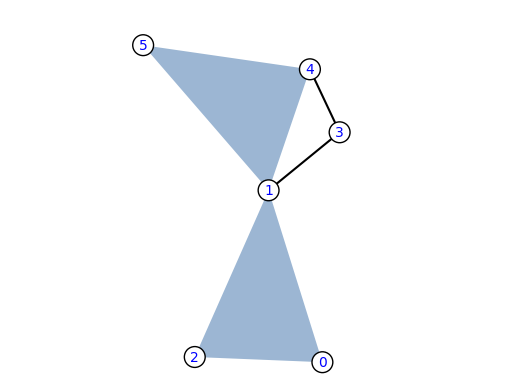

In [2]:
hyperedge_dict = {'a': [0,1,2], 'b': [1,4,5], 'c': [1,3], 'd': [3,4]}
H = xgi.Hypergraph(hyperedge_dict)
print(f"The hypergraph has {H.nodes} nodes and {H.edges} edges")
xgi.draw(H, node_labels=True, font_color_nodes="blue")

In [3]:
def uniform_adjacency_tensor(H):
    '''
    Given a Hypergraph H, returns its adjacency tensor.
    If the hypergraph is non-uniform, 
    we first uniformize (Hu) it adding a artificial node
    :param h :: Hypergraph:
    :return t :: numpy.ndarray:
    '''
    assert isinstance(H, xgi.Hypergraph)

    if not xgi.is_uniform(H):
        Hu = uniformize(H)
    
    dimension = len(Hu.nodes)
    m = len(Hu.edges.members()[0])
    
    shape = [dimension] * m
    T = np.zeros(shape)

    for edge in Hu.edges.members():
        
        if '*' in edge:
            edge.remove('*')
            edge.add(dimension-1)
        
        perms = permutations(edge)
        
        for indices in perms:
            T[indices] = 1
    
    return T

In [4]:
T = uniform_adjacency_tensor(H)
T

array([[[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
      

In [5]:
def repeated_perms(li, m):
    '''Given a list with unique elements, return the set of lists obtained from it
    by duplicating any entries to reach length m lists, and their permutations. 
    '''

    unique = len(li)
    to_add = m - unique
    
    assert to_add > 0 and max(Counter(li).values()) == 1 and isinstance(li,list)

    goodperms = set()
    for perm in permutations(li * (to_add+1), m):
        if len(Counter(perm).values()) == unique:
            goodperms.add(perm)
    
    return goodperms

In [6]:
def uniform_adjacency_tensor_Benson(H):
    '''
    Given a non-uniform Hypergraph H, returns its adjacency tensor,
    as defined by Benson in the conclusions of this paper.
    :param h :: Hypergraph:
    :return t :: numpy.ndarray:
    '''
    assert isinstance(H, xgi.Hypergraph)

    if xgi.is_uniform(H):
        raise Exception('Use the uniform_adjacency_tensor() funcion')
    
    # Obtain the list of hyperedge lengths
    ms = [len(he) for he in H.edges.members()]

    # Initialize a tensor with the order of the maximum hyperedge
    shape = [len(H.nodes)] * max(ms)  
    T = np.zeros(shape)
    
    for he in H.edges.members():
        
        repeat = max(ms) - len(he)
        
        if repeat == 0:
            goodperms = permutations(he)
        else:
            goodperms = repeated_perms(list(he), max(ms))
        
        for indices in goodperms:
            T[indices] = 1
    
    return T

In [7]:
TB = uniform_adjacency_tensor_Benson(H)
TB

array([[[0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0.]],

       [[0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 1., 0., 0.],
      

In [8]:
a

NameError: name 'a' is not defined

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib as mpl

mpl.use('svg')
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)

# Create a complete graph with an odd number of nodes
nnodes = 10
G = nx.complete_graph(nnodes)

#1,2,3

edges = list(G.edges())
for edge in edges:
    if edge[0] in (6,7,8,9) and edge[1] in (6,7,8,9):
        G[edge[0]][edge[1]]["width"] = 4
    elif edge[0] in (3,4,5) and edge[1] not in (0,1,2):
        G[edge[0]][edge[1]]["width"] = 2
    elif edge[1] in (3,4,5) and edge[0] not in (0,1,2):
        G[edge[0]][edge[1]]["width"] = 2
    else:
        G[edge[0]][edge[1]]["width"] = 0.8

pos = nx.circular_layout(G)
# Create a figure with 1:1 aspect ratio to preserve the circle.
fig, ax = plt.subplots(figsize=(8, 8))
nodecolor = ['magenta', 'magenta', 'magenta', 'blue', 'blue', 'blue', 'olive', 'olive', 'olive', 'olive']
nodesize = [300,300,300,500,500,500,700,700,700,700]
node_opts = {"node_size": nodesize, "node_color": nodecolor, "edgecolors": "k", "linewidths": 2.0}
nx.draw_networkx_nodes(G, pos, **node_opts)
#nx.draw_networkx_labels(G, pos, font_size=14)
# Extract color from edge data
edge_widths = [edgedata["width"] for _, _, edgedata in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color='k')

ax.set_axis_off()
fig.tight_layout()
plt.show()

plt.savefig('smallweighted.pdf')

/tmp/ipykernel_7947/2386224752.py:42: UserWarning: Matplotlib is currently using svg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
